In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

print(os.getcwd())

/data/Documents/DataScience/Courses/Dissertation/src/evaluation


## CVC5 Results

In [30]:
df = pd.read_csv('../benchmark/sygus_solver_cvc5_results_new.csv')
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3783 entries, 0 to 3782
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   run_id            3783 non-null   object 
 1   run_datetime      3783 non-null   object 
 2   solver            3783 non-null   object 
 3   config            3783 non-null   object 
 4   file              3783 non-null   object 
 5   return_code       3783 non-null   int64  
 6   time              3783 non-null   float64
 7   avg_cpu_usage     3783 non-null   float64
 8   max_memory_usage  3783 non-null   float64
 9   stdout            3348 non-null   object 
 10  stderr            435 non-null    object 
dtypes: float64(3), int64(1), object(7)
memory usage: 325.2+ KB
None
                                 run_id                run_datetime solver  \
0  b699c394-9c7c-489d-ad5c-9ca3fb146a88  2024-08-11T16:52:48.609846   cvc5   
1  b699c394-9c7c-489d-ad5c-9ca3fb146a88  2024-08-11T16:52

In [31]:
df['config'] = (df['config']
                .str.replace('--tlimit=30000', '')
                .str.replace('--sygus-enum=', '')
                .str.replace('--sygus-si=', '_single_invocation_')
                .str.replace('--', '_')
                .str.replace('-', '_')
                .str.replace('=', '_')
                .str.replace(' ', '')
                )
df['file'] = df['file'].str.replace('/data/Documents/DataScience/Courses/Dissertation/problems/sygus_comp_2019_clia_track/', '').str.replace('.sl','').str.strip()
df.head(20)

,run_id,run_datetime,solver,config,file,return_code,time,avg_cpu_usage,max_memory_usage,stdout,stderr
0,b699c394-9c7c-489d-ad5c-9ca3fb146a88,2024-08-11T16:52:48.609846,cvc5,smart,absolute,0,0.100908,0.000000,0.382812,(\n(define-fun abs ((x Int)) Int 1)\n)\n,NaN
1,b699c394-9c7c-489d-ad5c-9ca3fb146a88,2024-08-11T16:52:48.609846,cvc5,random,absolute,0,0.101807,0.000000,0.421875,(\n(define-fun abs ((x Int)) Int x)\n)\n,NaN
2,b699c394-9c7c-489d-ad5c-9ca3fb146a88,2024-08-11T16:52:48.609846,cvc5,fast,absolute,0,0.101644,0.000000,0.222656,(\n(define-fun abs ((x Int)) Int x)\n)\n,NaN
3,b699c394-9c7c-489d-ad5c-9ca3fb146a88,2024-08-11T16:52:48.609846,cvc5,var_agnostic,absolute,0,0.101853,0.000000,0.421875,(\n(define-fun abs ((x Int)) Int 1)\n)\n,NaN
4,b699c394-9c7c-489d-ad5c-9ca3fb146a88,2024-08-11T16:52:48.609846,cvc5,smart_single_invocation_none,absolute,0,0.101616,0.000000,0.195312,(\n(define-fun abs ((x Int)) Int 1)\n)\n,NaN
5,b699c394-9c7c-489d-ad5c-9ca3fb146a88,2024-08-11T16:52:48.609846,cvc5,smart_single_invocation_use,absolute,0,0.101601,0.000000,0.242188,(\n(define-fun abs ((x Int)) Int 1)\n)\n,NaN
6,b699c394-9c7c-489d-ad5c-9ca3fb146a88,2024-08-11T16:52:48.609846,cvc5,smart_single_invocation_all,absolute,0,0.101946,0.000000,0.445312,(\n(define-fun abs ((x Int)) Int 1)\n)\n,NaN
7,b699c394-9c7c-489d-ad5c-9ca3fb146a88,2024-08-11T16:52:48.609846,cvc5,smart_sygus_grammar_cons_simple,absolute,0,0.101618,0.000000,0.195312,(\n(define-fun abs ((x Int)) Int 1)\n)\n,NaN
8,b699c394-9c7c-489d-ad5c-9ca3fb146a88,2024-08-11T16:52:48.609846,cvc5,smart_sygus_grammar_cons_any_term,absolute,0,0.101626,0.000000,0.000000,(\n(define-fun abs ((x Int)) Int 0)\n)\n,NaN
9,b699c394-9c7c-489d-ad5c-9ca3fb146a88,2024-08-11T16:52:48.609846,cvc5,smart_sygus_fair_direct,absolute,0,0.101764,0.000000,0.195312,(\n(define-fun abs ((x Int)) Int 1)\n)\n,NaN


In [32]:
config_counts = df['config'].value_counts()
print("Configuration counts:")
print(config_counts)

Configuration counts:
config
smart                                291
random                               291
fast                                 291
var_agnostic                         291
smart_single_invocation_none         291
smart_single_invocation_use          291
smart_single_invocation_all          291
smart_sygus_grammar_cons_simple      291
smart_sygus_grammar_cons_any_term    291
smart_sygus_fair_direct              291
smart_sygus_fair_dt_size_bound       291
smart_sygus_fair_none                291
smart_sygus_repair_const             291
Name: count, dtype: int64


In [33]:
avg_time_by_config = df.groupby('config')['time'].mean().sort_values(ascending=False).reset_index()
avg_time_by_problem = df.groupby('file')['time'].mean().sort_values(ascending=False).reset_index()

print("\nAverage Execution Time by Configuration:")
print(avg_time_by_config)
print("\nAverage Execution Time by Problem:")
print(avg_time_by_problem)


Average Execution Time by Configuration:
                               config       time
0        smart_single_invocation_none  21.589986
1   smart_sygus_grammar_cons_any_term   2.842567
2                        var_agnostic   1.614381
3                              random   1.519980
4             smart_sygus_fair_direct   1.361729
5                                fast   1.347679
6                               smart   1.330195
7         smart_single_invocation_all   1.327494
8            smart_sygus_repair_const   1.327165
9         smart_single_invocation_use   1.326209
10    smart_sygus_grammar_cons_simple   1.325175
11              smart_sygus_fair_none   0.646223
12     smart_sygus_fair_dt_size_bound   0.642341

Average Execution Time by Problem:
                   file       time
0     small_linear_func  26.004852
1     large_linear_func  26.003650
2                 max20  21.452446
3                 max19  12.266609
4                 max18  10.620946
..                  ...   

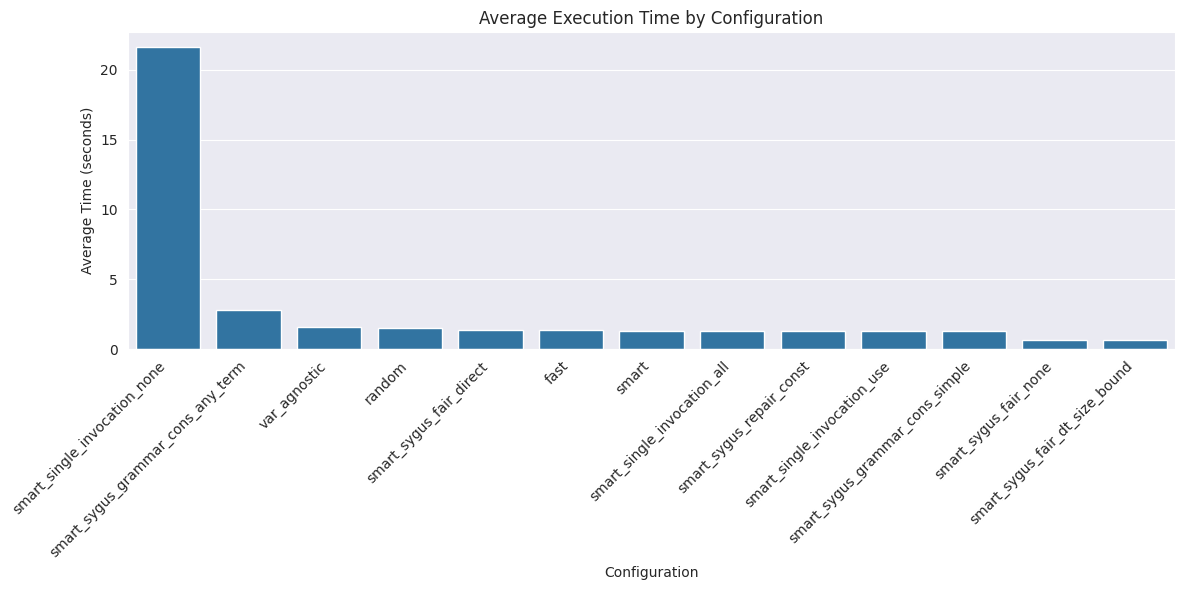

In [34]:
plt.figure(figsize=(12, 6))
sns.barplot(x='config', y='time', data=avg_time_by_config)
plt.title('Average Execution Time by Configuration')
plt.xlabel('Configuration')
plt.ylabel('Average Time (seconds)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


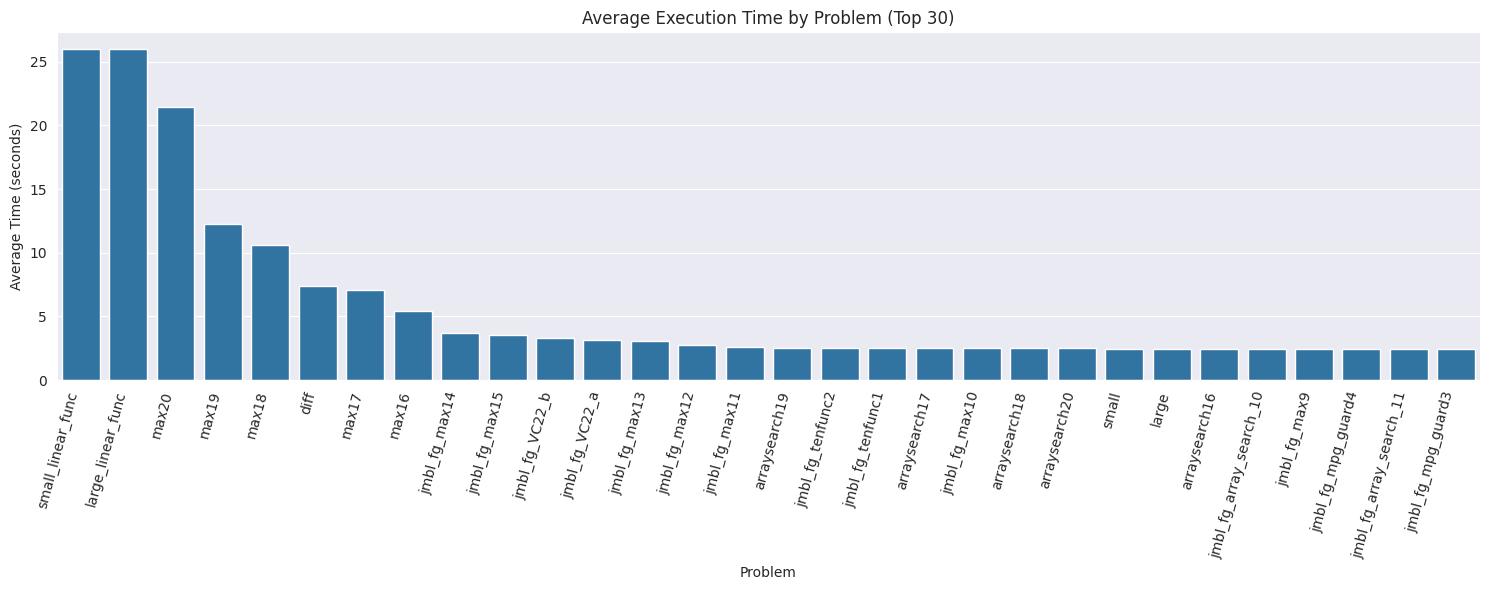

In [36]:
plt.figure(figsize=(15, 6))
sns.barplot(x='file', y='time', data=avg_time_by_problem.head(30))
plt.title('Average Execution Time by Problem (Top 30)')
plt.xlabel('Problem')
plt.ylabel('Average Time (seconds)')
plt.xticks(rotation=75, ha='right')
plt.tight_layout()
plt.show()

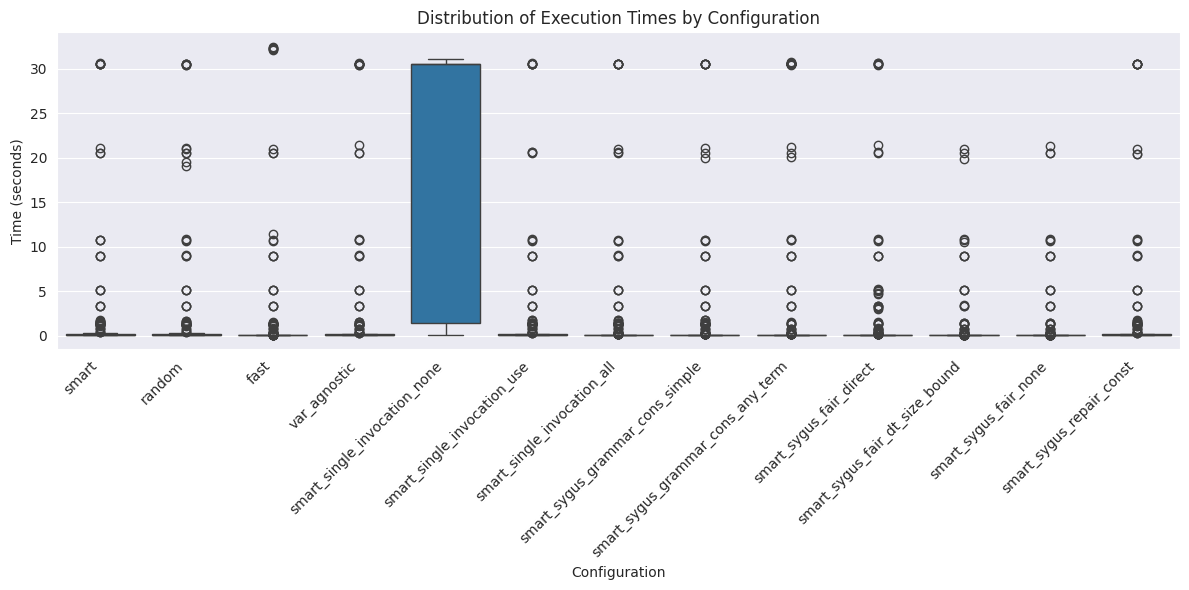

In [37]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='config', y='time', data=df)
plt.title('Distribution of Execution Times by Configuration')
plt.xlabel('Configuration')
plt.ylabel('Time (seconds)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


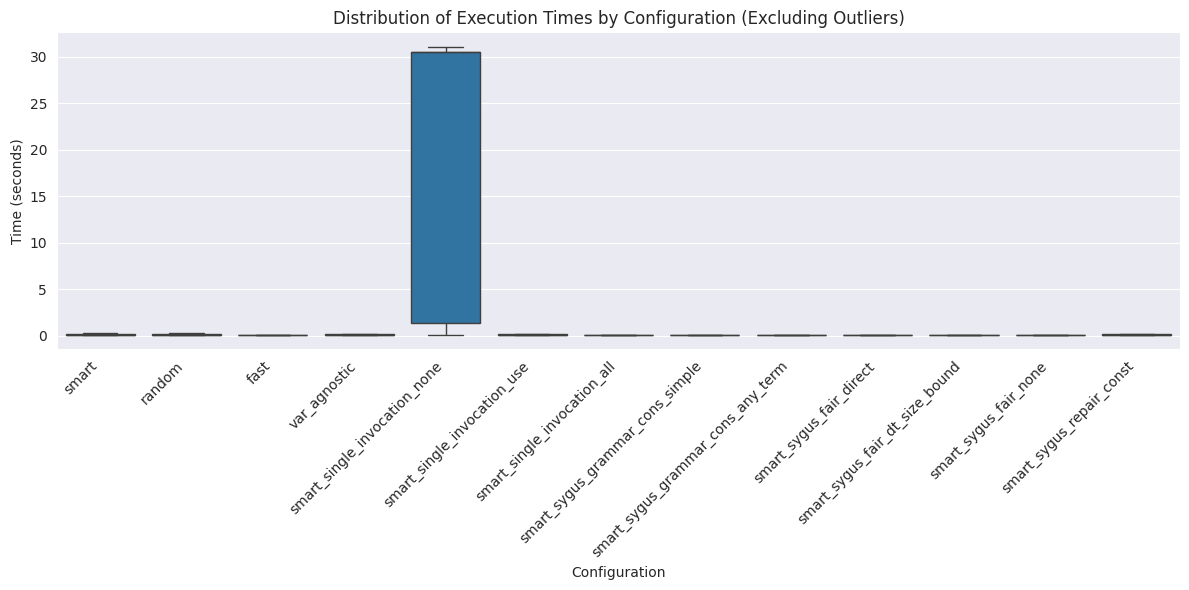

In [38]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='config', y='time', data=df, showfliers=False)
plt.title('Distribution of Execution Times by Configuration (Excluding Outliers)')
plt.xlabel('Configuration')
plt.ylabel('Time (seconds)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

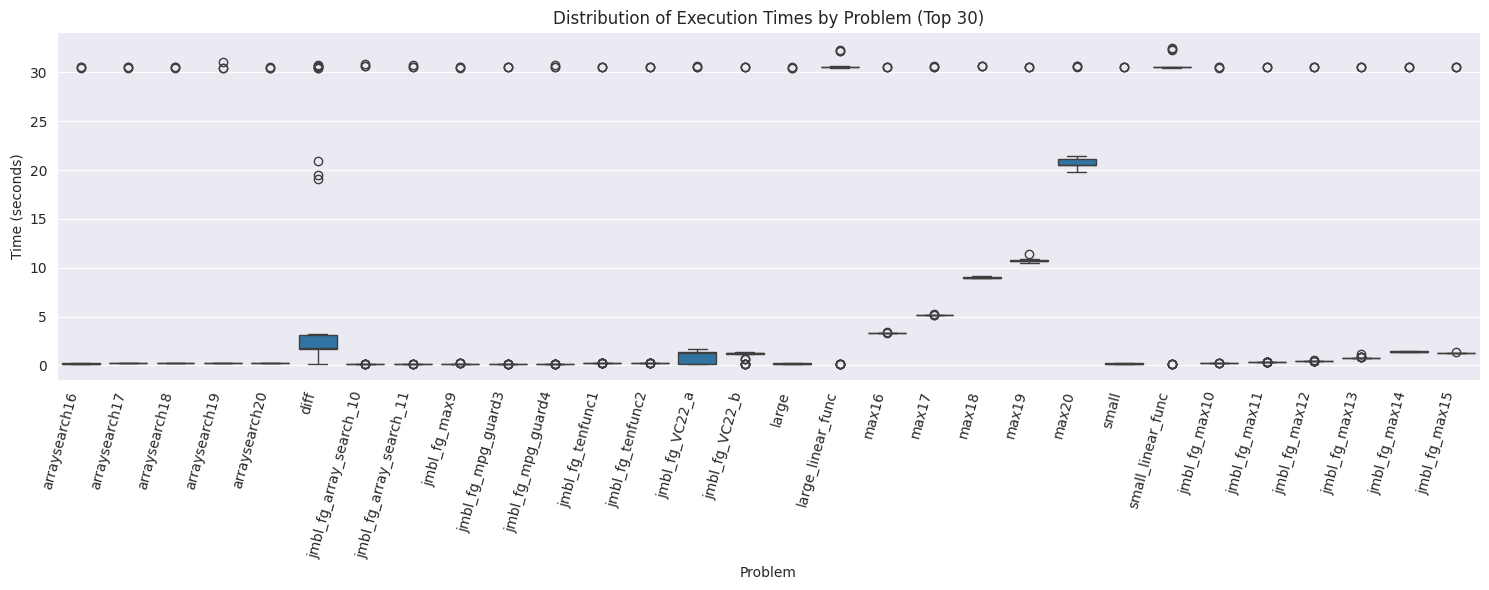

In [39]:
plt.figure(figsize=(15, 6))
sns.boxplot(x='file', y='time', data=df[df['file'].isin(avg_time_by_problem.head(30)['file'])])
plt.title('Distribution of Execution Times by Problem (Top 30)')
plt.xlabel('Problem')
plt.ylabel('Time (seconds)')
plt.xticks(rotation=75, ha='right')
plt.tight_layout()
plt.show()



Return code counts:
return_code_label
Success    3348
Timeout     279
Error       156
Name: count, dtype: int64


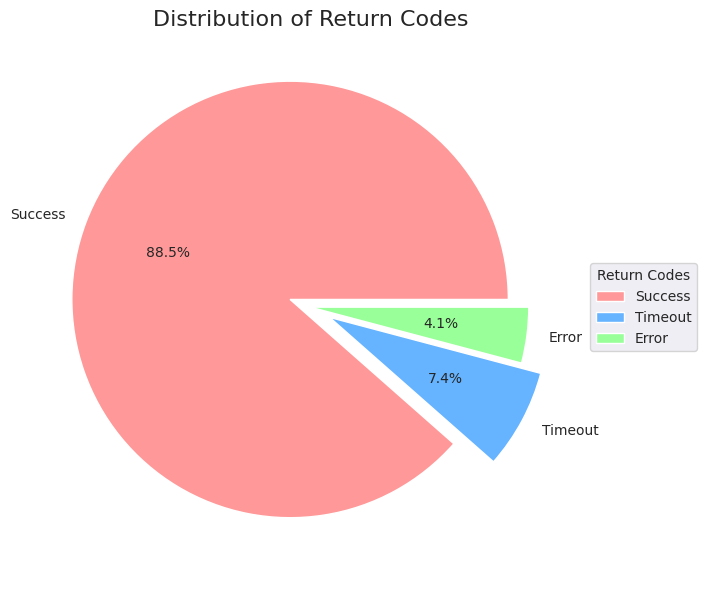

In [48]:
return_code_mapping = {-6: 'Timeout', 1: 'Error', 0: 'Success'}
df['return_code_label'] = df['return_code'].map(return_code_mapping)

return_code_counts = df['return_code_label'].value_counts()
print("\nReturn code counts:")
print(return_code_counts)

plt.figure(figsize=(10, 6))
colors = ['#ff9999', '#66b3ff', '#99ff99']  # Red for Error, Blue for Timeout, Green for Success
return_code_counts.plot(kind='pie', autopct='%1.1f%%', colors=colors, explode=[0.1, 0.1, 0])
plt.title('Distribution of Return Codes', fontsize=16)
plt.ylabel('')
plt.legend(title="Return Codes", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.tight_layout()
plt.show()


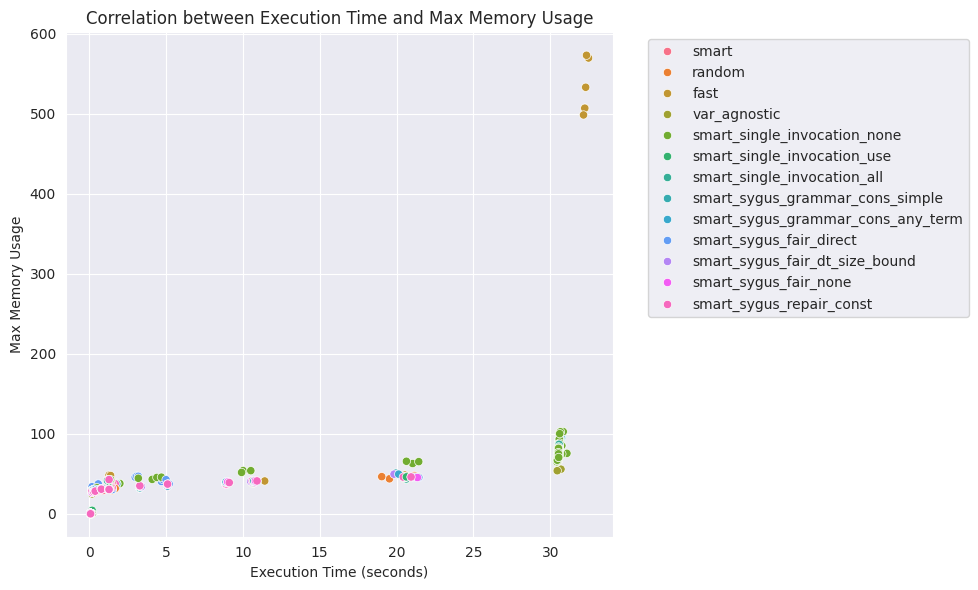

In [45]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='time', y='max_memory_usage', hue='config', data=df)
plt.title('Correlation between Execution Time and Max Memory Usage')
plt.xlabel('Execution Time (seconds)')
plt.ylabel('Max Memory Usage')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



Success Rate by Configuration:
config
smart_sygus_fair_none                0.958763
smart_sygus_fair_dt_size_bound       0.958763
smart                                0.938144
random                               0.938144
fast                                 0.938144
smart_sygus_grammar_cons_simple      0.938144
smart_single_invocation_all          0.938144
smart_sygus_fair_direct              0.938144
smart_single_invocation_use          0.938144
smart_sygus_repair_const             0.938144
var_agnostic                         0.927835
smart_sygus_grammar_cons_any_term    0.886598
smart_single_invocation_none         0.268041
Name: success, dtype: float64


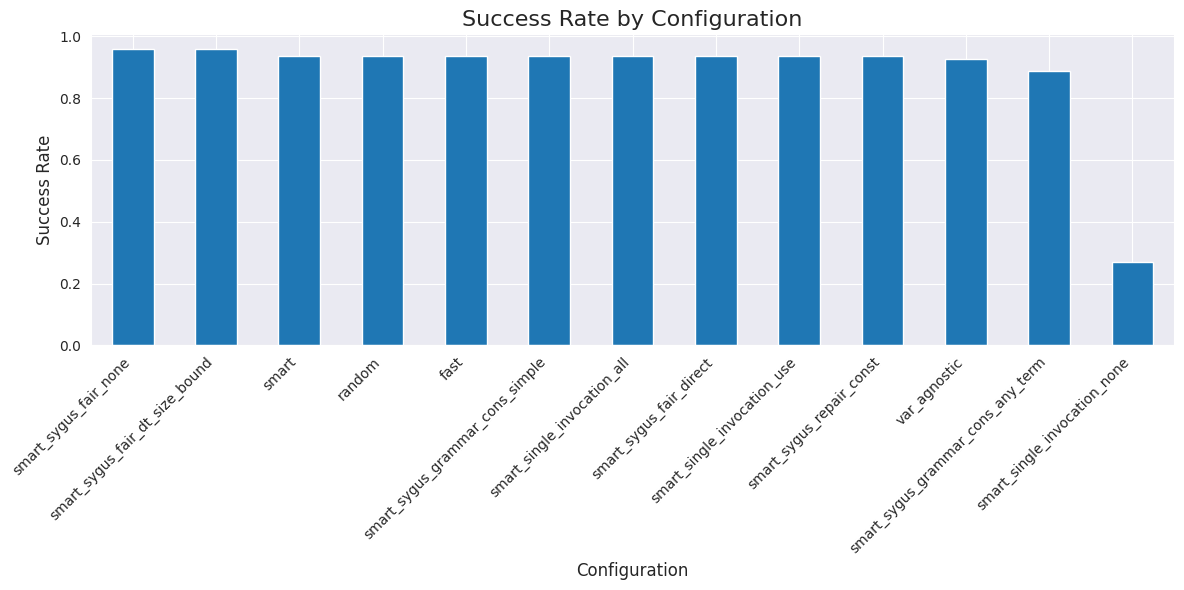

In [49]:
df['success'] = df['return_code'] == 0
success_rate = df.groupby('config')['success'].mean().sort_values(ascending=False)
print("\nSuccess Rate by Configuration:")
print(success_rate)

plt.figure(figsize=(12, 6))
success_rate.plot(kind='bar')
plt.title('Success Rate by Configuration', fontsize=16)
plt.xlabel('Configuration', fontsize=12)
plt.ylabel('Success Rate', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# PySynthLab Results